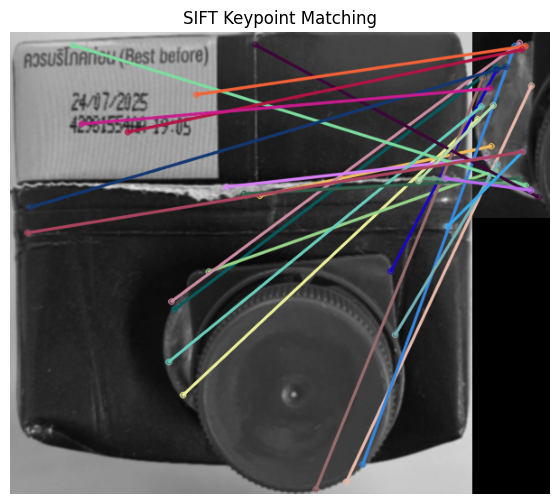

Number of matches: 24


In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
image1_path = "../data/large/ng_image.jpg"  # Replace with first image path
image2_path = "../data/large/defected_model.jpg"  # Replace with second image path

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Validate both images
if image1 is None or image2 is None:
    raise ValueError("Error: Unable to load one or both images. Check file paths.")

# # convert to binary
# _, image1 = cv2.threshold(image1, 70, 255, cv2.THRESH_BINARY)
# _, image2 = cv2.threshold(image2, 70, 255, cv2.THRESH_BINARY)

# Resize the images to the same size
image1 = cv2.resize(image1, (512, 512))
image2 = cv2.resize(image2, (512, 512))[512//2:512-50, 512//3:512//2]

# Blur the images
image1 = cv2.GaussianBlur(image1, (5, 5), 0)
image2 = cv2.GaussianBlur(image2, (5, 5), 0)

# Step 1: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect and compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Step 3: Use BFMatcher to match keypoints
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Step 4: Draw the top matches
matched_image = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, matches[:50], None,
    matchesThickness=2, flags=10
)


# #feature matching
# bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# matches = bf.match(descriptors_1,descriptors_2)
# matches = sorted(matches, key = lambda x:x.distance)

# img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

# Display the matched image
plt.figure(figsize=(12, 6))
plt.imshow(matched_image, cmap="gray")
plt.title("SIFT Keypoint Matching")
plt.axis("off")
plt.show()

# Output the number of matches
print(f"Number of matches: {len(matches)}")


Histogram similarity: 0.7938553191272989


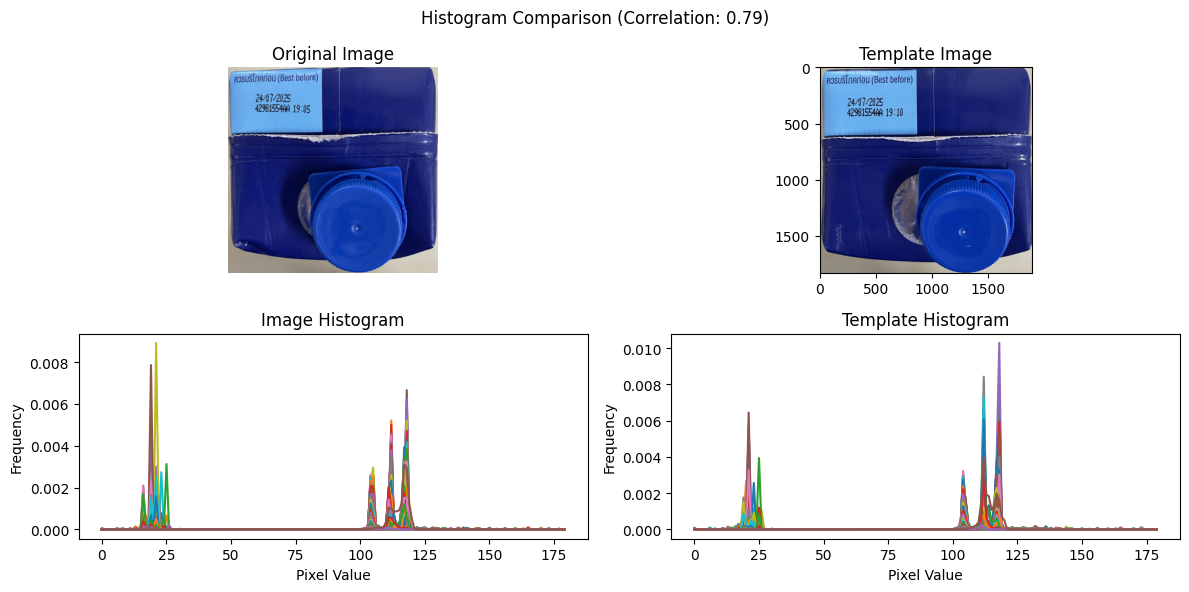

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the template
image = cv2.imread("../data/large/ng_image.jpg")
template = cv2.imread('../data/large/defected_model.jpg')

# Convert images to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_template = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)

# Apply histogram equalization to the Value (V) channel
hsv_image[:, :, 2] = cv2.equalizeHist(hsv_image[:, :, 2])
hsv_template[:, :, 2] = cv2.equalizeHist(hsv_template[:, :, 2])

# Convert back to BGR color space after histogram equalization
image_eq = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
template_eq = cv2.cvtColor(hsv_template, cv2.COLOR_HSV2BGR)

# Calculate histograms in the HSV color space
hist_image = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist_template = cv2.calcHist([hsv_template], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize histograms
hist_image /= hist_image.sum()
hist_template /= hist_template.sum()

# Compare histograms using correlation
similarity = cv2.compareHist(hist_image, hist_template, cv2.HISTCMP_CORREL)
print(f"Histogram similarity: {similarity}")

# Visualize the histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(template[:, :, ::-1])
plt.title("Template Image")

plt.subplot(2, 2, 3)
plt.plot(hist_image)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.plot(hist_template)
plt.title("Template Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.suptitle(f"Histogram Comparison (Correlation: {similarity:.2f})")
plt.tight_layout()
plt.show()


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the template
image = cv2.imread("../data/large/ok_image.png")
template = cv2.imread('../data/large/defected_model.jpg')

# Convert images to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_template = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)

# Apply histogram equalization to the Value (V) channel
hsv_image[:, :, 2] = cv2.equalizeHist(hsv_image[:, :, 2])
hsv_template[:, :, 2] = cv2.equalizeHist(hsv_template[:, :, 2])

# Convert back to BGR color space after histogram equalization
image_eq = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
template_eq = cv2.cvtColor(hsv_template, cv2.COLOR_HSV2BGR)

# Calculate histograms in the HSV color space
hist_image = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist_template = cv2.calcHist([hsv_template], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize histograms
hist_image /= hist_image.sum()
hist_template /= hist_template.sum()

# Compare histograms using correlation
similarity = cv2.compareHist(hist_image, hist_template, cv2.HISTCMP_CORREL)
print(f"Histogram similarity: {similarity}")

# Visualize the histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(template[:, :, ::-1])
plt.title("Template Image")

plt.subplot(2, 2, 3)
plt.plot(hist_image)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.plot(hist_template)
plt.title("Template Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.suptitle(f"Histogram Comparison (Correlation: {similarity:.2f})")
plt.tight_layout()
plt.show()


[ WARN:0@2016.240] global loadsave.cpp:241 findDecoder imread_('../data/large/ok_image.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
